In [1]:
import pandas as pd

dfi_102021 = pd.read_excel("SINAPI_Preco_Ref_Insumos_PB_102021_Desonerado.XLS")
dfi_052020 = pd.read_excel("SINAPI_Preco_Ref_Insumos_PB_052020_Desonerado.XLS")

dfi_102021.columns = dfi_102021.iloc[5] # Indicando as colunas indicadas na planilha
dfi_052020.columns = dfi_102021.columns

dfi_102021.drop((dfi_102021.index[:6]), inplace = True) # Excluindo os cabeçalhos desnecessários
dfi_052020.drop((dfi_052020.index[:6]), inplace = True)

In [2]:
# Relação de Insumos incluidos desde Maio de 2020
dfi_102021[~(dfi_102021['CODIGO  '].isin(dfi_052020['CODIGO  ']))] # Insumos que estão em 102021 e não estão em 052020

5,CODIGO,DESCRICAO DO INSUMO,UNIDADE,ORIGEM DO PRECO,PRECO MEDIANO R$
250,41610,"ANEL DE CONCRETO ARMADO COM FUNDO, PARA FOSSA ...",UN,AS,"601,94"
251,41611,"ANEL DE CONCRETO ARMADO COM FUNDO, PARA FOSSA ...",UN,AS,"948,78"
252,41612,"ANEL DE CONCRETO ARMADO COM FUNDO, PARA FOSSA ...",UN,AS,"1.332,22"
253,41637,"ANEL DE CONCRETO ARMADO, COM FUROS/DRENO PARA ...",UN,AS,"124,53"
254,41638,"ANEL DE CONCRETO ARMADO, COM FUROS/DRENO PARA ...",UN,AS,"162,22"
...,...,...,...,...,...
5083,44469,"USINA DE ASFALTO, GRAVIMETRICA, CAPACIDADE DE ...",UN,AS,"8.545.993,01"
5135,43595,"VARA FINA PARA CREMONA, EM FERRO ZINCADO BRANC...",UN,CR,"17,54"
5136,43596,"VARA FINA PARA CREMONA, EM FERRO ZINCADO BRANC...",UN,CR,"20,28"
5161,44470,"VIBROACABADORA DE ASFALTO SOBRE ESTEIRAS, LARG...",UN,AS,"1.886.984,38"


In [3]:
# Relação de Insumos desativados desde Maio de 2020
dfi_052020[~(dfi_052020['CODIGO  '].isin(dfi_102021['CODIGO  ']))] # Insumos que estão em 052020 e não estão em 102021

5,CODIGO,DESCRICAO DO INSUMO,UNIDADE,ORIGEM DO PRECO,PRECO MEDIANO R$
6,41758,!EM PROCESSO DE DESATIVACAO! CADEADO EM ACO IN...,UN,CR,"135,30"
7,1363,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,M2,C,"18,89"
12,1357,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,"50,95"
15,3113,!EM PROCESSO DE DESATIVACAO! CREMONA COM CASTA...,CJ,CR,"59,03"
16,2404,!EM PROCESSO DE DESATIVACAO! DIVISORIA COLMEIA...,M2,AS,"82,36"
...,...,...,...,...,...
4977,42000,"TUBO DE REVESTIMENTO, EM ACO, CORPO SCHEDULE 4...",M,AS,"2.795,75"
5138,26034,"USINA DE ASFALTO, GRAVIMETRICA, CAPACIDADE DE ...",UN,AS,"5.336.351,95"
5216,25970,"VIBROACABADORA DE ASFALTO SOBRE ESTEIRAS, LARG...",UN,AS,"1.348.040,32"
5260,11157,WASH PRIMER PARA TINTA AUTOMOTIVA,GL,CR,"145,51"


In [4]:
# Insumos presentes em ambas a bases;
dfi_102021[(dfi_102021['CODIGO  '].isin(dfi_052020['CODIGO  ']))].dropna()

# O mesmo resultado de dfi_052020[(dfi_052020['CODIGO  '].isin(dfi_102021['CODIGO  ']))]

5,CODIGO,DESCRICAO DO INSUMO,UNIDADE,ORIGEM DO PRECO,PRECO MEDIANO R$
6,1344,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,"95,27"
7,1342,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,"168,42"
8,1349,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,"240,19"
9,1350,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,"41,99"
10,1359,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,"82,64"
...,...,...,...,...,...
5201,35272,"VIGA NAO APARELHADA *6 X 20* CM, EM MACARANDUB...",M,CR,"39,15"
5202,4481,VIGA NAO APARELHADA *8 X 16* CM EM MACARANDUBA...,M,CR,"41,90"
5203,34345,VIGIA DIURNO,H,CR,"10,54"
5204,41096,VIGIA DIURNO (MENSALISTA),MES,CR,"1.852,15"


In [5]:
df_merge = dfi_102021.merge(dfi_052020, on='CODIGO  ')
df_merge.dropna(inplace = True)

# Convertendo a string de formato brasileiro no formato float
df_merge['  PRECO MEDIANO R$_x'] = df_merge['  PRECO MEDIANO R$_x'].apply(lambda x:float(x.replace('.','').replace(',','.')))
df_merge['  PRECO MEDIANO R$_y'] = df_merge['  PRECO MEDIANO R$_y'].apply(lambda x:float(x.replace('.','').replace(',','.')))

df_merge['Reajuste'] = ((df_merge['  PRECO MEDIANO R$_x'].replace(',','.').apply(float)) / (df_merge['  PRECO MEDIANO R$_y'].replace(',','.').apply(float)))-1
df_merge

5,CODIGO,DESCRICAO DO INSUMO_x,UNIDADE_x,ORIGEM DO PRECO_x,PRECO MEDIANO R$_x,DESCRICAO DO INSUMO_y,UNIDADE_y,ORIGEM DO PRECO_y,PRECO MEDIANO R$_y,Reajuste
0,1344,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,95.27,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,41.51,1.295110
1,1342,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,168.42,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,73.38,1.295176
2,1349,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,240.19,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,104.66,1.294955
3,1350,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,41.99,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,C,40.00,0.049750
4,1359,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,82.64,!EM PROCESSO DE DESATIVACAO! CHAPA DE MADEIRA ...,UN,CR,78.72,0.049797
...,...,...,...,...,...,...,...,...,...,...
5025,35272,"VIGA NAO APARELHADA *6 X 20* CM, EM MACARANDUB...",M,CR,39.15,"VIGA DE MADEIRA NAO APARELHADA *6 X 20* CM, MA...",M,CR,27.70,0.413357
5026,4481,VIGA NAO APARELHADA *8 X 16* CM EM MACARANDUBA...,M,CR,41.90,"VIGA DE MADEIRA NAO APARELHADA 8 X 16 CM, MACA...",M,CR,28.54,0.468115
5027,34345,VIGIA DIURNO,H,CR,10.54,VIGIA DIURNO,H,CR,9.92,0.062500
5028,41096,VIGIA DIURNO (MENSALISTA),MES,CR,1852.15,VIGIA DIURNO (MENSALISTA),MES,CR,1743.99,0.062019


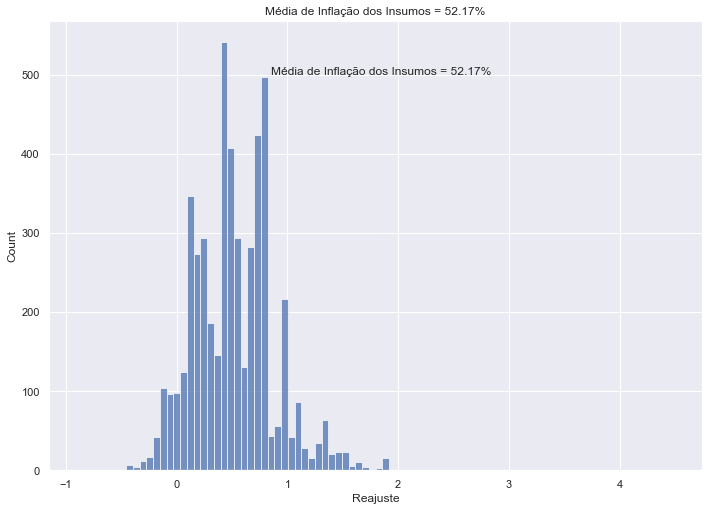

In [9]:
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.histplot(data = df_merge, x='Reajuste')

media = np.mean(df_merge['Reajuste'])

ax.set(title = 'DISTRIBUIÇÃO ')
ax.text(0.85,500,f'Média de Inflação dos Insumos = {media:.2%}', fontsize=12);

In [7]:
df_merge[df_merge['Reajuste'] >= float(df_merge['Reajuste'].quantile([.999]))] # Os insumos com os maiores reajustes

5,CODIGO,DESCRICAO DO INSUMO_x,UNIDADE_x,ORIGEM DO PRECO_x,PRECO MEDIANO R$_x,DESCRICAO DO INSUMO_y,UNIDADE_y,ORIGEM DO PRECO_y,PRECO MEDIANO R$_y,Reajuste
255,6138,"ANEL DE VEDACAO, PVC FLEXIVEL, 100 MM, PARA SA...",UN,CR,7.39,"VEDACAO PVC, 100 MM, PARA SAIDA VASO SANITARIO",UN,CR,1.35,4.474074
2100,3108,"FECHO QUEBRA UNHA, EM LATAO COM ACABAMENTO CRO...",UN,CR,98.03,"FECHO DE EMBUTIR, TIPO UNHA, COMANDO COM ALAVA...",UN,CR,21.31,3.600188
2101,3105,"FECHO QUEBRA UNHA, EM LATAO COM ACABAMENTO CRO...",UN,CR,128.22,"FECHO DE EMBUTIR, TIPO UNHA, COMANDO COM ALAVA...",UN,CR,33.11,2.872546
2135,3106,"FERROLHO COM FECHO CHATO E PORTA CADEADO , EM ...",UN,CR,14.68,"FERROLHO / FECHO CHATO, DE SOBREPOR, EM FERRO ...",UN,CR,3.65,3.021918
2318,36888,GUARNICAO / MOLDURA / ARREMATE DE ACABAMENTO P...,M,CR,48.39,GUARNICAO/MOLDURA DE ACABAMENTO PARA ESQUADRIA...,M,CR,9.63,4.024922
2409,599,"JANELA FIXA, EM ALUMINIO PERFIL 20, 60 X 80 C...",M2,CR,1203.70,"JANELA FIXA EM ALUMINIO, 60 X 80 CM (A X L), ...",M2,CR,329.54,2.652667
